# Capstone : Future Housing Prices In Metro Portland, OR Cities

The below is my process of seeing how my data works together, as well as the process for how I learn to model to predict the future prices around Portland Oregon

Sections

[EDA](#EDA)
<br>
[CORRELATIONS](#CORRELATIONS)
<br>
[LINEAR REGRESSION](#LINEAR_REGRESSION)

Import numpy and pandas

In [1]:
import numpy as np
import pandas as pd

create dataframe with tsv document

In [2]:
df = pd.read_csv("city_market_tracker.tsv000", delimiter='\t')

## EDA

we are going to look into my dataset and see how it all the columns relate to eachother

In [3]:
df.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2012-08-01,2012-08-31,30,place,6,9148,f,"Kirkland, WA",Kirkland,Washington,...,0.144659,0.193548,-0.003173,-0.153757,0.607143,0.044643,0.496032,"Seattle, WA",42644,2023-02-12 14:58:17
1,2021-11-01,2021-11-30,30,place,6,12172,f,"Marietta, OH",Marietta,Ohio,...,-0.050000,0.152174,0.012174,NaN,0.307692,0.013575,0.307692,"Marietta, OH",31930,2023-02-12 14:58:17
2,2021-12-01,2021-12-31,30,place,6,1378,f,"Belvedere, CA",Belvedere,California,...,0.666667,NaN,NaN,NaN,1.000000,0.000000,0.750000,"San Rafael, CA",42034,2023-02-12 14:58:17
3,2016-10-01,2016-10-31,30,place,6,2341,f,"Butler, NJ",Butler,New Jersey,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,"Newark, NJ",35084,2023-02-12 14:58:17
4,2015-08-01,2015-08-31,30,place,6,11486,f,"Lindon, UT",Lindon,Utah,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Provo, UT",39340,2023-02-12 14:58:17


In [4]:
# look at all columns and column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616565 entries, 0 to 4616564
Data columns (total 58 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   period_begin                    object 
 1   period_end                      object 
 2   period_duration                 int64  
 3   region_type                     object 
 4   region_type_id                  int64  
 5   table_id                        int64  
 6   is_seasonally_adjusted          object 
 7   region                          object 
 8   city                            object 
 9   state                           object 
 10  state_code                      object 
 11  property_type                   object 
 12  property_type_id                int64  
 13  median_sale_price               float64
 14  median_sale_price_mom           float64
 15  median_sale_price_yoy           float64
 16  median_list_price               float64
 17  median_list_price_mom      

We want to view only the the cities I am looking into around the Portland area

It looks like the data can provide that, uner `parent_metro_region`

lets filter this and see

In [5]:
df_or = df.loc[df["parent_metro_region"]=="Portland, OR"]

In [6]:
df_or.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
133,2013-10-01,2013-10-31,30,place,6,26540,f,"West Haven-Sylvan, OR",West Haven-Sylvan,Oregon,...,0.000000,0.666667,0.500000,0.166667,NaN,NaN,NaN,"Portland, OR",38900,2023-02-12 14:58:17
598,2013-09-01,2013-09-30,30,place,6,36337,f,"Rhododendron, OR",Rhododendron,Oregon,...,0.500000,0.263158,0.063158,-0.014620,0.0,-1.00,-0.500000,"Portland, OR",38900,2023-02-12 14:58:17
602,2015-05-01,2015-05-31,30,place,6,6130,f,"Estacada, OR",Estacada,Oregon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Portland, OR",38900,2023-02-12 14:58:17
620,2016-05-01,2016-05-31,30,place,6,7385,f,"Gladstone, OR",Gladstone,Oregon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Portland, OR",38900,2023-02-12 14:58:17
685,2012-05-01,2012-05-31,30,place,6,18977,f,"Troutdale, OR",Troutdale,Oregon,...,0.158088,0.250000,0.041667,-0.030000,0.3,0.05,-0.033333,"Portland, OR",38900,2023-02-12 14:58:17


It looks like it worked, but lets check all the cities

In [7]:
# gives all unique cities
df_or["city"].unique()

array(['West Haven-Sylvan', 'Rhododendron', 'Estacada', 'Gladstone',
       'Troutdale', 'Barberton', 'Dundee', 'Sherwood', 'Raleigh Hills',
       'Mulino', 'Cedar Mill', 'Hazel Dell', 'Mount Hood Villages',
       'Ridgefield', 'Vernonia', 'Scappoose', 'West Slope', 'Tualatin',
       'Maywood Park', 'Amboy', 'Happy Valley', 'West Linn',
       'Fern Prairie', 'Oak Grove', 'Washougal', 'Oatfield',
       'Mount Hood Village', 'King City', 'Rockcreek', 'Felida', 'Boring',
       'Clackamas', 'Camas', 'Warren', 'Mill Plain', 'Oregon City',
       'Rainier', 'Damascus', 'Oak Hills', 'Brush Prairie', 'Vancouver',
       'Metzger', 'Carlton', 'Marlene Village', 'Yamhill', 'Beaverton',
       'Willamina', 'Yacolt', 'Cherry Grove', 'Durham', 'Venersborg',
       'Gresham', 'McMinnville', 'Portland', 'Lake Oswego', 'Beavercreek',
       'Rivergrove', 'Tigard', 'Orchards', 'Fairview', 'Amity', 'Bethany',
       'Dollars Corner', 'Aloha', 'Newberg', 'Sunnyside', 'Lafayette',
       'North Plai

Some Cities I don't recognize. Lets see if all are in Oregon. 

We only want to deal with the cities in Oregon.

In [8]:
df_or["state"].unique()

array(['Oregon', 'Washington'], dtype=object)

Looks like it does include cities not in Oregon

In [9]:
df_or = df_or.loc[df_or["state"]=="Oregon"]

In [10]:
df_or["state"].unique()

array(['Oregon'], dtype=object)

In [11]:
df_or.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
133,2013-10-01,2013-10-31,30,place,6,26540,f,"West Haven-Sylvan, OR",West Haven-Sylvan,Oregon,...,0.000000,0.666667,0.500000,0.166667,NaN,NaN,NaN,"Portland, OR",38900,2023-02-12 14:58:17
598,2013-09-01,2013-09-30,30,place,6,36337,f,"Rhododendron, OR",Rhododendron,Oregon,...,0.500000,0.263158,0.063158,-0.014620,0.0,-1.00,-0.500000,"Portland, OR",38900,2023-02-12 14:58:17
602,2015-05-01,2015-05-31,30,place,6,6130,f,"Estacada, OR",Estacada,Oregon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Portland, OR",38900,2023-02-12 14:58:17
620,2016-05-01,2016-05-31,30,place,6,7385,f,"Gladstone, OR",Gladstone,Oregon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Portland, OR",38900,2023-02-12 14:58:17
685,2012-05-01,2012-05-31,30,place,6,18977,f,"Troutdale, OR",Troutdale,Oregon,...,0.158088,0.250000,0.041667,-0.030000,0.3,0.05,-0.033333,"Portland, OR",38900,2023-02-12 14:58:17


In [12]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27753 entries, 133 to 4616503
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   period_begin                    27753 non-null  object 
 1   period_end                      27753 non-null  object 
 2   period_duration                 27753 non-null  int64  
 3   region_type                     27753 non-null  object 
 4   region_type_id                  27753 non-null  int64  
 5   table_id                        27753 non-null  int64  
 6   is_seasonally_adjusted          27753 non-null  object 
 7   region                          27753 non-null  object 
 8   city                            27753 non-null  object 
 9   state                           27753 non-null  object 
 10  state_code                      27753 non-null  object 
 11  property_type                   27753 non-null  object 
 12  property_type_id            

Filtered Dataset shows it has 57 columns and 27753 rows. 

to make things easier with this dataset, we will change the index number to match the leinth of the current dataset

this might change later

In [13]:
# will sort by period_begin
df_or = df_or.sort_values(by="period_begin")
df_or.index = range(len(df_or))

In [14]:
df_or.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2012-01-01,2012-01-31,30,place,6,13439,f,"Newberg, OR",Newberg,Oregon,...,-0.083333,0.329545,0.116062,0.112985,0.200000,-0.466667,-0.244444,"Portland, OR",38900,2023-02-12 14:58:17
1,2012-01-01,2012-01-31,30,place,6,2767,f,"Canby, OR",Canby,Oregon,...,0.200000,0.271186,0.008029,-0.047962,0.285714,-0.047619,-0.047619,"Portland, OR",38900,2023-02-12 14:58:17
2,2012-01-01,2012-01-31,30,place,6,36348,f,"Boring, OR",Boring,Oregon,...,0.000000,0.125000,0.013889,-0.208333,NaN,NaN,NaN,"Portland, OR",38900,2023-02-12 14:58:17
3,2012-01-01,2012-01-31,30,place,6,21950,f,"Clackamas, OR",Clackamas,Oregon,...,-0.083333,0.151515,0.031515,-0.260250,0.500000,0.000000,0.500000,"Portland, OR",38900,2023-02-12 14:58:17
4,2012-01-01,2012-01-31,30,place,6,8192,f,"Happy Valley, OR",Happy Valley,Oregon,...,-0.125000,0.145251,-0.017399,-0.059718,0.250000,-0.035714,-0.083333,"Portland, OR",38900,2023-02-12 14:58:17


We will now look at the null values and see if there are any

In [15]:
df_or.isnull().sum()

period_begin                         0
period_end                           0
period_duration                      0
region_type                          0
region_type_id                       0
table_id                             0
is_seasonally_adjusted               0
region                               0
city                                 0
state                                0
state_code                           0
property_type                        0
property_type_id                     0
median_sale_price                    0
median_sale_price_mom             3220
median_sale_price_yoy             3521
median_list_price                 3192
median_list_price_mom             5530
median_list_price_yoy             5879
median_ppsf                         28
median_ppsf_mom                   3233
median_ppsf_yoy                   3534
median_list_ppsf                  3194
median_list_ppsf_mom              5534
median_list_ppsf_yoy              5879
homes_sold               

There seems to be a fair amount of null values.

Some of these columns though do not seem neccessary. 

I believe we can remove any mom and yoy column as they are interpreted by calculations in the current dataset.

This means there is likely to be colinearity down the line within each. 

In [16]:
# looks for columns with yoy or mom in it and drops them
df_or = df_or.drop(columns=df_or.columns[df_or.columns.str.contains('yoy|mom')])

In [17]:
# Sanity Check
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753 entries, 0 to 27752
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   period_begin                    27753 non-null  object 
 1   period_end                      27753 non-null  object 
 2   period_duration                 27753 non-null  int64  
 3   region_type                     27753 non-null  object 
 4   region_type_id                  27753 non-null  int64  
 5   table_id                        27753 non-null  int64  
 6   is_seasonally_adjusted          27753 non-null  object 
 7   region                          27753 non-null  object 
 8   city                            27753 non-null  object 
 9   state                           27753 non-null  object 
 10  state_code                      27753 non-null  object 
 11  property_type                   27753 non-null  object 
 12  property_type_id                

Before we go back and try to handle the nulls, are there any columns are not needed?

We will look and see if any columns are just not usefull, or hold irrelevant data.

In [18]:
df_or["region_type"]

0        place
1        place
2        place
3        place
4        place
         ...  
27748    place
27749    place
27750    place
27751    place
27752    place
Name: region_type, Length: 27753, dtype: object

In [19]:
df_or.loc[df_or["region_type"]!="place"]

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code,last_updated


In [20]:
df_or["region_type_id"]

0        6
1        6
2        6
3        6
4        6
        ..
27748    6
27749    6
27750    6
27751    6
27752    6
Name: region_type_id, Length: 27753, dtype: int64

In [21]:
df_or.loc[df_or["region_type_id"]!=6]

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code,last_updated


`region_type` through out all the rows only shows "Place"

`region_type_id` through out all the rows only shows 6

We will drop these columns as they don't hold anything that is different between each row

In [22]:
df_or = df_or.drop(columns="region_type")

In [23]:
df_or = df_or.drop(columns="region_type_id")

In [24]:
# sanity
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753 entries, 0 to 27752
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   period_begin                    27753 non-null  object 
 1   period_end                      27753 non-null  object 
 2   period_duration                 27753 non-null  int64  
 3   table_id                        27753 non-null  int64  
 4   is_seasonally_adjusted          27753 non-null  object 
 5   region                          27753 non-null  object 
 6   city                            27753 non-null  object 
 7   state                           27753 non-null  object 
 8   state_code                      27753 non-null  object 
 9   property_type                   27753 non-null  object 
 10  property_type_id                27753 non-null  int64  
 11  median_sale_price               27753 non-null  float64
 12  median_list_price               

In [25]:
df_or.head()

,period_begin,period_end,period_duration,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,...,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2012-01-01,2012-01-31,30,13439,f,"Newberg, OR",Newberg,Oregon,OR,Single Family Residential,...,88.0,6.3,85.0,0.953472,0.000,0.329545,0.200000,"Portland, OR",38900,2023-02-12 14:58:17
1,2012-01-01,2012-01-31,30,2767,f,"Canby, OR",Canby,Oregon,OR,Single Family Residential,...,59.0,5.9,135.0,0.943829,0.200,0.271186,0.285714,"Portland, OR",38900,2023-02-12 14:58:17
2,2012-01-01,2012-01-31,30,36348,f,"Boring, OR",Boring,Oregon,OR,All Residential,...,8.0,2.7,164.0,0.980100,0.000,0.125000,NaN,"Portland, OR",38900,2023-02-12 14:58:17
3,2012-01-01,2012-01-31,30,21950,f,"Clackamas, OR",Clackamas,Oregon,OR,All Residential,...,33.0,8.3,155.0,0.859180,0.250,0.151515,0.500000,"Portland, OR",38900,2023-02-12 14:58:17
4,2012-01-01,2012-01-31,30,8192,f,"Happy Valley, OR",Happy Valley,Oregon,OR,All Residential,...,179.0,7.5,142.0,0.964494,0.125,0.145251,0.250000,"Portland, OR",38900,2023-02-12 14:58:17


I believe the following columns have the same issue. I will look into them and remove if so.
- `period_duration`
- `is_seasonally_adjusted`

The others below should be obvious as well
- `state` 
- `parent_metro_region_metro_code`
- `parent_metro_region`

In [26]:
# period_duration count
df_or["period_duration"].loc[df_or["period_duration"]==30].count()

27753

In [27]:
df_or.loc[df_or["period_duration"]!=30]

,period_begin,period_end,period_duration,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,...,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code,last_updated


In [28]:
# is_seasonally_adjusted count 
df_or["is_seasonally_adjusted"].loc[df_or["is_seasonally_adjusted"]=="f"].count()

27753

In [29]:
df_or.loc[df_or["is_seasonally_adjusted"]!="f"]

,period_begin,period_end,period_duration,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,...,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code,last_updated


In [30]:
# state count 
df_or["state"].loc[df_or["state"]=="Oregon"].count()

27753

In [31]:
df_or.loc[df_or["state"]!="Oregon"]

,period_begin,period_end,period_duration,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,...,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code,last_updated


In [32]:
# parent_metro_region_metro_code count 
df_or["parent_metro_region_metro_code"].loc[df_or["parent_metro_region_metro_code"]==38900].count()

27753

In [33]:
df_or.loc[df_or["parent_metro_region_metro_code"]!=38900]

,period_begin,period_end,period_duration,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,...,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code,last_updated


In [34]:
# parent_metro_region count 
df_or["parent_metro_region"].loc[df_or["parent_metro_region"]=="Portland, OR"].count()

27753

In [35]:
df_or.loc[df_or["parent_metro_region"]!="Portland, OR"]

,period_begin,period_end,period_duration,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,...,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code,last_updated


All from before show the exact same for all rows, so we will drop them.

In [36]:
 df_or = df_or.drop(columns=["period_duration","is_seasonally_adjusted","state",\
                    "parent_metro_region_metro_code", "parent_metro_region"])

In [37]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753 entries, 0 to 27752
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   period_begin             27753 non-null  object 
 1   period_end               27753 non-null  object 
 2   table_id                 27753 non-null  int64  
 3   region                   27753 non-null  object 
 4   city                     27753 non-null  object 
 5   state_code               27753 non-null  object 
 6   property_type            27753 non-null  object 
 7   property_type_id         27753 non-null  int64  
 8   median_sale_price        27753 non-null  float64
 9   median_list_price        24561 non-null  float64
 10  median_ppsf              27725 non-null  float64
 11  median_list_ppsf         24559 non-null  float64
 12  homes_sold               27753 non-null  float64
 13  pending_sales            23847 non-null  float64
 14  new_listings          

In [38]:
df_or.head()

,period_begin,period_end,table_id,region,city,state_code,property_type,property_type_id,median_sale_price,median_list_price,...,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,last_updated
0,2012-01-01,2012-01-31,13439,"Newberg, OR",Newberg,OR,Single Family Residential,6,203500.0,194000.0,...,10.0,22.0,88.0,6.3,85.0,0.953472,0.000,0.329545,0.200000,2023-02-12 14:58:17
1,2012-01-01,2012-01-31,2767,"Canby, OR",Canby,OR,Single Family Residential,6,207888.5,212000.0,...,7.0,12.0,59.0,5.9,135.0,0.943829,0.200,0.271186,0.285714,2023-02-12 14:58:17
2,2012-01-01,2012-01-31,36348,"Boring, OR",Boring,OR,All Residential,-1,315000.0,NaN,...,NaN,NaN,8.0,2.7,164.0,0.980100,0.000,0.125000,NaN,2023-02-12 14:58:17
3,2012-01-01,2012-01-31,21950,"Clackamas, OR",Clackamas,OR,All Residential,-1,78750.0,196900.0,...,4.0,14.0,33.0,8.3,155.0,0.859180,0.250,0.151515,0.500000,2023-02-12 14:58:17
4,2012-01-01,2012-01-31,8192,"Happy Valley, OR",Happy Valley,OR,All Residential,-1,353750.0,334900.0,...,16.0,47.0,179.0,7.5,142.0,0.964494,0.125,0.145251,0.250000,2023-02-12 14:58:17


There is still more to look into. 

`region` is easy to see gives the same result as `city` and `state`. This will be dropped

`last_updated` does not matter to the rest of the data. It is just when this data was edited. 

We will also see if `property_type` is equal to `property_type_id`. 
   - If it is, we will only keep one of them

In [39]:
# drop region & last_update
df_or = df_or.drop(columns=["region", "last_updated"])

In [40]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753 entries, 0 to 27752
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   period_begin             27753 non-null  object 
 1   period_end               27753 non-null  object 
 2   table_id                 27753 non-null  int64  
 3   city                     27753 non-null  object 
 4   state_code               27753 non-null  object 
 5   property_type            27753 non-null  object 
 6   property_type_id         27753 non-null  int64  
 7   median_sale_price        27753 non-null  float64
 8   median_list_price        24561 non-null  float64
 9   median_ppsf              27725 non-null  float64
 10  median_list_ppsf         24559 non-null  float64
 11  homes_sold               27753 non-null  float64
 12  pending_sales            23847 non-null  float64
 13  new_listings             24561 non-null  float64
 14  inventory             

In [41]:
df_or[['property_type','property_type_id']].iloc[0:15]

,property_type,property_type_id
0,Single Family Residential,6
1,Single Family Residential,6
2,All Residential,-1
3,All Residential,-1
4,All Residential,-1
5,Single Family Residential,6
6,Single Family Residential,6
7,Single Family Residential,6
8,Townhouse,13
9,All Residential,-1


`property_type` is equal to `property_type_id` and we will drop `property_type_id`

In [42]:
df_or = df_or.drop(columns=["property_type_id"])

In [43]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753 entries, 0 to 27752
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   period_begin             27753 non-null  object 
 1   period_end               27753 non-null  object 
 2   table_id                 27753 non-null  int64  
 3   city                     27753 non-null  object 
 4   state_code               27753 non-null  object 
 5   property_type            27753 non-null  object 
 6   median_sale_price        27753 non-null  float64
 7   median_list_price        24561 non-null  float64
 8   median_ppsf              27725 non-null  float64
 9   median_list_ppsf         24559 non-null  float64
 10  homes_sold               27753 non-null  float64
 11  pending_sales            23847 non-null  float64
 12  new_listings             24561 non-null  float64
 13  inventory                25490 non-null  float64
 14  months_of_supply      

In [44]:
df_or

,period_begin,period_end,table_id,city,state_code,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks
0,2012-01-01,2012-01-31,13439,Newberg,OR,Single Family Residential,203500.0,194000.0,113.102272,129.388295,14.0,10.0,22.0,88.0,6.3,85.0,0.953472,0.000000,0.329545,0.200000
1,2012-01-01,2012-01-31,2767,Canby,OR,Single Family Residential,207888.5,212000.0,118.160670,117.776639,10.0,7.0,12.0,59.0,5.9,135.0,0.943829,0.200000,0.271186,0.285714
2,2012-01-01,2012-01-31,36348,Boring,OR,All Residential,315000.0,NaN,121.621622,NaN,3.0,NaN,NaN,8.0,2.7,164.0,0.980100,0.000000,0.125000,NaN
3,2012-01-01,2012-01-31,21950,Clackamas,OR,All Residential,78750.0,196900.0,56.951548,115.415213,4.0,4.0,14.0,33.0,8.3,155.0,0.859180,0.250000,0.151515,0.500000
4,2012-01-01,2012-01-31,8192,Happy Valley,OR,All Residential,353750.0,334900.0,114.373978,124.968695,24.0,16.0,47.0,179.0,7.5,142.0,0.964494,0.125000,0.145251,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27748,2023-01-01,2023-01-31,10280,Lafayette,OR,Single Family Residential,480477.0,474960.0,275.438249,255.767367,6.0,3.0,3.0,12.0,2.0,21.0,0.991811,0.166667,0.750000,0.000000
27749,2023-01-01,2023-01-31,1036,Banks,OR,All Residential,420000.0,NaN,290.055249,NaN,3.0,2.0,NaN,1.0,0.3,9.0,0.980415,0.000000,1.000000,0.000000
27750,2023-01-01,2023-01-31,30773,Wilsonville,OR,Single Family Residential,632000.0,769000.0,296.333003,308.143921,15.0,11.0,16.0,34.0,2.3,48.0,0.971953,0.000000,0.352941,0.454545
27751,2023-01-01,2023-01-31,31646,Bethany,OR,Single Family Residential,875000.0,830000.0,324.910434,332.672581,17.0,18.0,22.0,49.0,2.9,7.0,0.994274,0.352941,0.224490,0.500000


Looking at what we have left:

`state_code` just lists the state, so we can remove that

`table_id` this gives the original table ID, which is not needed now

we will drop both

In [45]:
df_or = df_or.drop(columns=["state_code", "table_id"])

In [46]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753 entries, 0 to 27752
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   period_begin             27753 non-null  object 
 1   period_end               27753 non-null  object 
 2   city                     27753 non-null  object 
 3   property_type            27753 non-null  object 
 4   median_sale_price        27753 non-null  float64
 5   median_list_price        24561 non-null  float64
 6   median_ppsf              27725 non-null  float64
 7   median_list_ppsf         24559 non-null  float64
 8   homes_sold               27753 non-null  float64
 9   pending_sales            23847 non-null  float64
 10  new_listings             24561 non-null  float64
 11  inventory                25490 non-null  float64
 12  months_of_supply         25490 non-null  float64
 13  median_dom               27587 non-null  float64
 14  avg_sale_to_list      

Now that we trimmed the fat, lets take a look again at the null values

In [47]:
df_or.isnull().sum()

period_begin                  0
period_end                    0
city                          0
property_type                 0
median_sale_price             0
median_list_price          3192
median_ppsf                  28
median_list_ppsf           3194
homes_sold                    0
pending_sales              3906
new_listings               3192
inventory                  2263
months_of_supply           2263
median_dom                  166
avg_sale_to_list              7
sold_above_list               0
price_drops                6388
off_market_in_two_weeks    3906
dtype: int64

My first thought was to see if there is any specific `property_type` or `city` that creates the majority of the nulls

I created for loops to look into both

In [48]:
unique_property_type = df_or['property_type'].unique()

# loop over each property_type and check for null values
for ptype in unique_property_type:
    city_df = df_or[df_or['property_type'] == ptype]
    null_columns = city_df.isnull().sum()
    print(f"{ptype} {null_columns}")
    print("   ")


Single Family Residential period_begin                  0
period_end                    0
city                          0
property_type                 0
median_sale_price             0
median_list_price           455
median_ppsf                   0
median_list_ppsf            456
homes_sold                    0
pending_sales               698
new_listings                455
inventory                   184
months_of_supply            184
median_dom                   21
avg_sale_to_list              0
sold_above_list               0
price_drops                1056
off_market_in_two_weeks     698
dtype: int64
   
All Residential period_begin                  0
period_end                    0
city                          0
property_type                 0
median_sale_price             0
median_list_price           406
median_ppsf                   1
median_list_ppsf            407
homes_sold                    0
pending_sales               657
new_listings                406
inventory    

In [49]:
unique_cities = df_or['city'].unique()

# loop over each city and check for null values in that city
for city in unique_cities:
    city_df = df_or[df_or['city'] == city]
    null_columns = city_df.isnull().sum().max()
    total_rows = len(city_df.T.count())
    thing = null_columns/total_rows
    if null_columns:
        print(f"{thing} {city}")
    else:
        print(f"No null values found in {total_columns} columns for city {city}")

0.3253968253968254 Newberg
0.3033175355450237 Canby
0.33488372093023255 Boring
0.24188790560471976 Clackamas
0.1471861471861472 Happy Valley
0.3333333333333333 McMinnville
0.13064516129032258 Beaverton
0.12267657992565056 Vernonia
0.21855670103092784 West Haven-Sylvan
0.2774869109947644 West Slope
0.1073170731707317 Hillsboro
0.2891832229580574 Sunnyside
0.2608695652173913 King City
0.04 Estacada
0.2684085510688836 Sandy
0.24444444444444444 Cornelius
0.16837782340862423 Bethany
0.298050139275766 Rockcreek
0.2577777777777778 Milwaukie
0.2950191570881226 Banks
0.14556962025316456 Oatfield
0.20249221183800623 Garden Home-Whitford
0.2375886524822695 Aloha
0.31955922865013775 Marlene Village
0.12631578947368421 Rainier
0.2903225806451613 Fairview
0.2606837606837607 Yamhill
0.32083333333333336 Oregon City
0.26649746192893403 St. Helens
0.20833333333333334 Molalla
0.1937984496124031 Columbia City
0.10609037328094302 Wilsonville
0.12313432835820895 Carlton
0.30904522613065327 Troutdale
0.17791

In [50]:
df_or.loc[df_or["city"] == "Barlow"].isnull().sum()

period_begin                0
period_end                  0
city                        0
property_type               0
median_sale_price           0
median_list_price          26
median_ppsf                 0
median_list_ppsf           26
homes_sold                  0
pending_sales              26
new_listings               26
inventory                  26
months_of_supply           26
median_dom                  0
avg_sale_to_list            0
sold_above_list             0
price_drops                32
off_market_in_two_weeks    26
dtype: int64

There is too much to look at so we will just remove columns with too many nulls right now and maybe put them back on later. We will forward fill the columns we can: `median_ppsf`, `median_dom` and `avg_sale_to_list`

In [51]:
df_n = df_or.copy()

In [52]:
df_n = df_n[["period_begin","period_end","city","property_type","median_sale_price",\
             "median_ppsf","median_dom","avg_sale_to_list","sold_above_list" ]]

In [53]:
df_n.head()

,period_begin,period_end,city,property_type,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list
0,2012-01-01,2012-01-31,Newberg,Single Family Residential,203500.0,113.102272,85.0,0.953472,0.000
1,2012-01-01,2012-01-31,Canby,Single Family Residential,207888.5,118.160670,135.0,0.943829,0.200
2,2012-01-01,2012-01-31,Boring,All Residential,315000.0,121.621622,164.0,0.980100,0.000
3,2012-01-01,2012-01-31,Clackamas,All Residential,78750.0,56.951548,155.0,0.859180,0.250
4,2012-01-01,2012-01-31,Happy Valley,All Residential,353750.0,114.373978,142.0,0.964494,0.125


In [54]:
df_n.isnull().sum()

period_begin           0
period_end             0
city                   0
property_type          0
median_sale_price      0
median_ppsf           28
median_dom           166
avg_sale_to_list       7
sold_above_list        0
dtype: int64

In [55]:
# loop through all city and property type combinations to fill median_ppsf
for city in df_n['city'].unique():
    for property_type in df_n['property_type'].unique():
        # filter DataFrame by city and property type
        city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

        # fill null values with previous median_ppsf using interpolate option
        city_df['median_ppsf'] = city_df['median_ppsf'].interpolate()

        # update the original DataFrame with the filled values
        df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_ppsf'] = city_df['median_ppsf']


/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_80342/1358129582.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['median_ppsf'] = city_df['median_ppsf'].interpolate()


In [56]:
df_n.loc[df_n["median_ppsf"].isnull()]

,period_begin,period_end,city,property_type,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list
955,2012-05-01,2012-05-31,Estacada,Multi-Family (2-4 Unit),40000.0,NaN,6.0,0.769971,0.0
1106,2012-06-01,2012-06-30,Forest Grove,Multi-Family (2-4 Unit),154300.0,NaN,16.0,1.102931,1.0
1234,2012-07-01,2012-07-31,Canby,Multi-Family (2-4 Unit),132000.0,NaN,NaN,1.000000,0.0
6017,2014-08-01,2014-08-31,King City,Multi-Family (2-4 Unit),1330000.0,NaN,42.0,0.826087,0.0
6331,2014-10-01,2014-10-31,Rhododendron,Multi-Family (2-4 Unit),25000.0,NaN,301.0,0.714286,0.0
7768,2015-05-01,2015-05-31,Bethany,Multi-Family (2-4 Unit),1000000.0,NaN,181.0,0.952381,0.0


**Looking at below, I am finding out when looking at combinations of `city` and `property_types`, they do not go into every single year and month between 2012 and 2023.**

Also it shows that anything that does not fill with the above method only has 1 row, or is the first row, with this `property_type` and `city`

In [57]:
df_n.loc[(df_n["city"]=="Bethany")&(df_n["property_type"]=="Multi-Family (2-4 Unit)")]

,period_begin,period_end,city,property_type,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list
7768,2015-05-01,2015-05-31,Bethany,Multi-Family (2-4 Unit),1000000.0,NaN,181.0,0.952381,0.0


In [58]:
df_n.loc[(df_n["city"]=="Canby")&(df_n["property_type"]=="Multi-Family (2-4 Unit)")]

,period_begin,period_end,city,property_type,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list
1234,2012-07-01,2012-07-31,Canby,Multi-Family (2-4 Unit),132000.0,NaN,NaN,1.000000,0.0
1934,2012-10-01,2012-10-31,Canby,Multi-Family (2-4 Unit),250000.0,60.096154,123.0,1.041667,1.0
2107,2012-11-01,2012-11-30,Canby,Multi-Family (2-4 Unit),165000.0,87.394068,62.0,0.733659,0.0
2963,2013-04-01,2013-04-30,Canby,Multi-Family (2-4 Unit),250000.0,97.770825,20.0,0.980392,0.0
3588,2013-07-01,2013-07-31,Canby,Multi-Family (2-4 Unit),190000.0,86.757991,37.0,0.954774,0.0
5185,2014-04-01,2014-04-30,Canby,Multi-Family (2-4 Unit),269550.0,127.292008,386.0,1.024185,1.0
7214,2015-03-01,2015-03-31,Canby,Multi-Family (2-4 Unit),299900.0,103.413793,235.0,1.000000,0.0
7534,2015-04-01,2015-04-30,Canby,Multi-Family (2-4 Unit),281100.0,107.126524,18.0,0.956773,0.0
8313,2015-08-01,2015-08-31,Canby,Multi-Family (2-4 Unit),239900.0,89.648729,5.0,1.000000,0.0
9111,2015-11-01,2015-11-30,Canby,Multi-Family (2-4 Unit),495000.0,149.456522,45.0,1.000000,0.0


As there is not much left with null data, we will backfill the nulls that have more data for their respective `city` and `property_types`.
- There is not many rows so this shouldn't effect the model we make too much, as well it will allow us to keep all the respective rows. 


 
For any nulls that occur where there is only one row of data for their respective `city` and `property_types`, we will give it the median of that column.
- giving the mean of the column will at least not skew the model in any specific direction.

In [59]:
# loop through all city and property type combinations to fill median_ppsf
for city in df_n['city'].unique():
    for property_type in df_n['property_type'].unique():
        
        if df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)].count().max() > 1:
            
            # filter DataFrame by city and property type
            city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

            # fill null values with previous median_dom using the interpolate option
            city_df['median_ppsf'] = city_df['median_ppsf'].fillna(method="bfill")

            # update the original DataFrame with the filled values
            df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_ppsf'] = \
            city_df['median_ppsf']
            
        # if city and property_type have only 1 row, it will make median_ppsf equal the mean of itss column
        else: df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_ppsf'] = \
            df_n["median_ppsf"].mean()


/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_80342/1529675718.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['median_ppsf'] = city_df['median_ppsf'].fillna(method="bfill")


In [60]:
df_n.loc[df_n["median_ppsf"].isnull()]

,period_begin,period_end,city,property_type,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list


In [61]:
# loop through all city and property type combinations to fill median_dom
for city in df_n['city'].unique():
    for property_type in df_n['property_type'].unique():
        # filter DataFrame by city and property type
        city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

        # fill null values with previous median_dom using interpolate option
        city_df['median_dom'] = city_df['median_dom'].interpolate()

        # update the original DataFrame with the filled values
        df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_dom'] = city_df['median_dom']


/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_80342/3487989130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['median_dom'] = city_df['median_dom'].interpolate()


In [62]:
df_n.loc[df_n["median_dom"].isnull()]

,period_begin,period_end,city,property_type,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list
1234,2012-07-01,2012-07-31,Canby,Multi-Family (2-4 Unit),132000.0,60.096154,NaN,1.000000,0.0
1700,2012-09-01,2012-09-30,Milwaukie,Townhouse,252500.0,146.631823,NaN,0.971528,0.0
5858,2014-08-01,2014-08-31,Scappoose,Townhouse,177600.0,108.690330,NaN,1.000000,0.0
6270,2014-10-01,2014-10-31,Jennings Lodge,Townhouse,179900.0,117.275098,NaN,0.975068,0.0
6613,2014-12-01,2014-12-31,Marlene Village,Townhouse,200000.0,135.869565,NaN,1.000000,0.0
6674,2014-12-01,2014-12-31,Happy Valley,Multi-Family (2-4 Unit),595000.0,163.013699,NaN,1.000000,0.0
6719,2014-12-01,2014-12-31,Sunnyside,Multi-Family (2-4 Unit),595000.0,201.420446,NaN,1.000000,0.0
6971,2015-01-01,2015-01-31,Scappoose,Townhouse,179000.0,109.547124,NaN,1.000000,0.0
10687,2016-07-01,2016-07-31,Columbia City,Townhouse,249500.0,147.720545,NaN,0.998000,0.0


In [63]:
df_n.loc[(df_n["city"]=="Columbia City")&(df_n["property_type"]=="Townhouse")]

,period_begin,period_end,city,property_type,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list
10687,2016-07-01,2016-07-31,Columbia City,Townhouse,249500.0,147.720545,NaN,0.998000,0.0
17533,2019-02-01,2019-02-28,Columbia City,Townhouse,295000.0,175.282234,92.0,0.986622,0.0
22436,2021-01-01,2021-01-31,Columbia City,Townhouse,325000.0,250.965251,3.0,1.001541,1.0


In [64]:
# loop through all city and property type combinations to fill median_dom
for city in df_n['city'].unique():
    for property_type in df_n['property_type'].unique():
        
        if df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)].count().max() > 1:
            
            # filter DataFrame by city and property type
            city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

            # fill null values with previous median_dom using the interpolate option
            city_df['median_dom'] = city_df['median_dom'].fillna(method="bfill")

            # update the original DataFrame with the filled values
            df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_dom'] = \
            city_df['median_dom']
            
        # if city and property_type have only 1 row, it will make median_dom equal the mean of itss column
        else: df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_dom'] = \
            df_n["median_dom"].mean()

/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_80342/1769119186.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['median_dom'] = city_df['median_dom'].fillna(method="bfill")


In [65]:
df_n.loc[df_n["median_dom"].isnull()]

,period_begin,period_end,city,property_type,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list


In [66]:
# loop through all city and property type combinations to fill avg_sale_to_list
for city in df_n['city'].unique():
    for property_type in df_n['property_type'].unique():
        # filter DataFrame by city and property type
        city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

        # fill null values with previous avg_sale_to_list using the interpolate option
        city_df['avg_sale_to_list'] = city_df['avg_sale_to_list'].interpolate()

        # update the original DataFrame with the filled values
        df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'avg_sale_to_list'] = city_df['avg_sale_to_list']


/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_80342/2366257133.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['avg_sale_to_list'] = city_df['avg_sale_to_list'].interpolate()


In [67]:
df_n.loc[df_n["avg_sale_to_list"].isnull()]

,period_begin,period_end,city,property_type,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list
8818,2015-10-01,2015-10-31,Raleigh Hills,Multi-Family (2-4 Unit),32750000.0,7943.24521,48.0,NaN,0.0


In [68]:
# loop through all city and property type combinations to fill avg_sale_to_list
for city in df_n['city'].unique():
    for property_type in df_n['property_type'].unique():
        
        if df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)].count().max() > 1:
            
            # filter DataFrame by city and property type
            city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

            # fill null values with previous median_dom using the interpolate option
            city_df['avg_sale_to_list'] = city_df['avg_sale_to_list'].fillna(method="bfill")

            # update the original DataFrame with the filled values
            df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'avg_sale_to_list'] = \
            city_df['avg_sale_to_list']
            
        # if city and property_type have only 1 row, it will make median_dom equal the mean of itss column
        else: df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'avg_sale_to_list'] = \
            df_n["avg_sale_to_list"].mean()

/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_80342/2528528670.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['avg_sale_to_list'] = city_df['avg_sale_to_list'].fillna(method="bfill")


In [69]:
df_n.loc[df_n["avg_sale_to_list"].isnull()]

,period_begin,period_end,city,property_type,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list


All the columns have been cleaned, lets take a final check to see if we are missing anything.

In [70]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753 entries, 0 to 27752
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   period_begin       27753 non-null  object 
 1   period_end         27753 non-null  object 
 2   city               27753 non-null  object 
 3   property_type      27753 non-null  object 
 4   median_sale_price  27753 non-null  float64
 5   median_ppsf        27753 non-null  float64
 6   median_dom         27753 non-null  float64
 7   avg_sale_to_list   27753 non-null  float64
 8   sold_above_list    27753 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.9+ MB


In [71]:
df_n.isnull().sum()

period_begin         0
period_end           0
city                 0
property_type        0
median_sale_price    0
median_ppsf          0
median_dom           0
avg_sale_to_list     0
sold_above_list      0
dtype: int64

We are first going to try to run the data on a linear regression model. To do this, we first need to remove any co-linearity between columns. 

To do this we first have to make a few more columns.

`period_begin` and `period_end` are going to have to be made into seperate columns for their individual year, month, and days. 

We will call them `year_begin`, `month_begin`, and `day_begin`. We will do the same with period end as well. 

We wil use a new dataframe to generate this, as more work will have to be done to this data. We will call the new dataframe df_co

In [72]:
df_co = df_n.copy()

In [73]:
# convert to date format
df_co["period_end"] = pd.to_datetime(df_co["period_end"], format='%Y-%m-%d')

In [74]:
# make each part of the date it's own column
df_co["year_end"] = df_co["period_end"].dt.year
df_co["month_end"] = df_co["period_end"].dt.month
df_co["day_end"] = df_co["period_end"].dt.day

In [75]:
# Sanity Check
df_co

,period_begin,period_end,city,property_type,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list,year_end,month_end,day_end
0,2012-01-01,2012-01-31,Newberg,Single Family Residential,203500.0,113.102272,85.0,0.953472,0.000000,2012,1,31
1,2012-01-01,2012-01-31,Canby,Single Family Residential,207888.5,118.160670,135.0,0.943829,0.200000,2012,1,31
2,2012-01-01,2012-01-31,Boring,All Residential,315000.0,121.621622,164.0,0.980100,0.000000,2012,1,31
3,2012-01-01,2012-01-31,Clackamas,All Residential,78750.0,56.951548,155.0,0.859180,0.250000,2012,1,31
4,2012-01-01,2012-01-31,Happy Valley,All Residential,353750.0,114.373978,142.0,0.964494,0.125000,2012,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...
27748,2023-01-01,2023-01-31,Lafayette,Single Family Residential,480477.0,275.438249,21.0,0.991811,0.166667,2023,1,31
27749,2023-01-01,2023-01-31,Banks,All Residential,420000.0,290.055249,9.0,0.980415,0.000000,2023,1,31
27750,2023-01-01,2023-01-31,Wilsonville,Single Family Residential,632000.0,296.333003,48.0,0.971953,0.000000,2023,1,31
27751,2023-01-01,2023-01-31,Bethany,Single Family Residential,875000.0,324.910434,7.0,0.994274,0.352941,2023,1,31


In [76]:
df_co = df_co.drop(columns=["period_begin", "period_end"])

In [77]:
df_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753 entries, 0 to 27752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               27753 non-null  object 
 1   property_type      27753 non-null  object 
 2   median_sale_price  27753 non-null  float64
 3   median_ppsf        27753 non-null  float64
 4   median_dom         27753 non-null  float64
 5   avg_sale_to_list   27753 non-null  float64
 6   sold_above_list    27753 non-null  float64
 7   year_end           27753 non-null  int64  
 8   month_end          27753 non-null  int64  
 9   day_end            27753 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 2.1+ MB


We now have to create dummy variables for every `city` and `property_type` as these are not numerical yet

In [78]:
df_co["property_type"].value_counts()

All Residential              9852
Single Family Residential    9781
Condo/Co-op                  3507
Townhouse                    2926
Multi-Family (2-4 Unit)      1687
Name: property_type, dtype: int64

We see that `Multi-Family (2-4 Unit)` has the least amount of rows, so it will be removed to avoid colinearity.

In [79]:
dum = pd.get_dummies(df_co["property_type"]) # create dummy variables for property_type
df_co = pd.concat([df_co, dum], axis=1) #add them to df_co
df_co # sanity

,city,property_type,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list,year_end,month_end,day_end,All Residential,Condo/Co-op,Multi-Family (2-4 Unit),Single Family Residential,Townhouse
0,Newberg,Single Family Residential,203500.0,113.102272,85.0,0.953472,0.000000,2012,1,31,0,0,0,1,0
1,Canby,Single Family Residential,207888.5,118.160670,135.0,0.943829,0.200000,2012,1,31,0,0,0,1,0
2,Boring,All Residential,315000.0,121.621622,164.0,0.980100,0.000000,2012,1,31,1,0,0,0,0
3,Clackamas,All Residential,78750.0,56.951548,155.0,0.859180,0.250000,2012,1,31,1,0,0,0,0
4,Happy Valley,All Residential,353750.0,114.373978,142.0,0.964494,0.125000,2012,1,31,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27748,Lafayette,Single Family Residential,480477.0,275.438249,21.0,0.991811,0.166667,2023,1,31,0,0,0,1,0
27749,Banks,All Residential,420000.0,290.055249,9.0,0.980415,0.000000,2023,1,31,1,0,0,0,0
27750,Wilsonville,Single Family Residential,632000.0,296.333003,48.0,0.971953,0.000000,2023,1,31,0,0,0,1,0
27751,Bethany,Single Family Residential,875000.0,324.910434,7.0,0.994274,0.352941,2023,1,31,0,0,0,1,0


In [80]:
df_co = df_co.drop(columns=["property_type", "Multi-Family (2-4 Unit)"])
df_co # sanity

,city,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list,year_end,month_end,day_end,All Residential,Condo/Co-op,Single Family Residential,Townhouse
0,Newberg,203500.0,113.102272,85.0,0.953472,0.000000,2012,1,31,0,0,1,0
1,Canby,207888.5,118.160670,135.0,0.943829,0.200000,2012,1,31,0,0,1,0
2,Boring,315000.0,121.621622,164.0,0.980100,0.000000,2012,1,31,1,0,0,0
3,Clackamas,78750.0,56.951548,155.0,0.859180,0.250000,2012,1,31,1,0,0,0
4,Happy Valley,353750.0,114.373978,142.0,0.964494,0.125000,2012,1,31,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27748,Lafayette,480477.0,275.438249,21.0,0.991811,0.166667,2023,1,31,0,0,1,0
27749,Banks,420000.0,290.055249,9.0,0.980415,0.000000,2023,1,31,1,0,0,0
27750,Wilsonville,632000.0,296.333003,48.0,0.971953,0.000000,2023,1,31,0,0,1,0
27751,Bethany,875000.0,324.910434,7.0,0.994274,0.352941,2023,1,31,0,0,1,0


In [81]:
df_co["city"].value_counts()

Portland        652
Gresham         632
Beaverton       620
Hillsboro       615
Tigard          565
               ... 
Cherry Grove     94
Orient           94
Dilley           58
Barlow           32
Prescott         26
Name: city, Length: 81, dtype: int64

In [82]:
dum2 = pd.get_dummies(df_co["city"]) # create dummy variables for city
df_co = pd.concat([df_co, dum2], axis=1) #add them to df_co
df_co # sanity

,city,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list,year_end,month_end,day_end,All Residential,...,Tualatin,Vernonia,Warren,West Haven-Sylvan,West Linn,West Slope,Willamina,Wilsonville,Wood Village,Yamhill
0,Newberg,203500.0,113.102272,85.0,0.953472,0.000000,2012,1,31,0,...,0,0,0,0,0,0,0,0,0,0
1,Canby,207888.5,118.160670,135.0,0.943829,0.200000,2012,1,31,0,...,0,0,0,0,0,0,0,0,0,0
2,Boring,315000.0,121.621622,164.0,0.980100,0.000000,2012,1,31,1,...,0,0,0,0,0,0,0,0,0,0
3,Clackamas,78750.0,56.951548,155.0,0.859180,0.250000,2012,1,31,1,...,0,0,0,0,0,0,0,0,0,0
4,Happy Valley,353750.0,114.373978,142.0,0.964494,0.125000,2012,1,31,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27748,Lafayette,480477.0,275.438249,21.0,0.991811,0.166667,2023,1,31,0,...,0,0,0,0,0,0,0,0,0,0
27749,Banks,420000.0,290.055249,9.0,0.980415,0.000000,2023,1,31,1,...,0,0,0,0,0,0,0,0,0,0
27750,Wilsonville,632000.0,296.333003,48.0,0.971953,0.000000,2023,1,31,0,...,0,0,0,0,0,0,0,1,0,0
27751,Bethany,875000.0,324.910434,7.0,0.994274,0.352941,2023,1,31,0,...,0,0,0,0,0,0,0,0,0,0


We will drop `Prescott` as it has the fewest number of columns

In [83]:
df_co = df_co.drop(columns=["city", "Prescott"])
df_co # sanity

,median_sale_price,median_ppsf,median_dom,avg_sale_to_list,sold_above_list,year_end,month_end,day_end,All Residential,Condo/Co-op,...,Tualatin,Vernonia,Warren,West Haven-Sylvan,West Linn,West Slope,Willamina,Wilsonville,Wood Village,Yamhill
0,203500.0,113.102272,85.0,0.953472,0.000000,2012,1,31,0,0,...,0,0,0,0,0,0,0,0,0,0
1,207888.5,118.160670,135.0,0.943829,0.200000,2012,1,31,0,0,...,0,0,0,0,0,0,0,0,0,0
2,315000.0,121.621622,164.0,0.980100,0.000000,2012,1,31,1,0,...,0,0,0,0,0,0,0,0,0,0
3,78750.0,56.951548,155.0,0.859180,0.250000,2012,1,31,1,0,...,0,0,0,0,0,0,0,0,0,0
4,353750.0,114.373978,142.0,0.964494,0.125000,2012,1,31,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27748,480477.0,275.438249,21.0,0.991811,0.166667,2023,1,31,0,0,...,0,0,0,0,0,0,0,0,0,0
27749,420000.0,290.055249,9.0,0.980415,0.000000,2023,1,31,1,0,...,0,0,0,0,0,0,0,0,0,0
27750,632000.0,296.333003,48.0,0.971953,0.000000,2023,1,31,0,0,...,0,0,0,0,0,0,0,1,0,0
27751,875000.0,324.910434,7.0,0.994274,0.352941,2023,1,31,0,0,...,0,0,0,0,0,0,0,0,0,0


## CORRELATIONS

We can now look at the colinearity off all our data

I will split our data into x and y variables

y = median_sale_price

x = everything else

I will then try to first run a heatmap

In [84]:
y = df_co[["median_sale_price"]].copy()
x = df_co.drop(columns='median_sale_price').copy()

In [85]:
x_corr = x.corr()

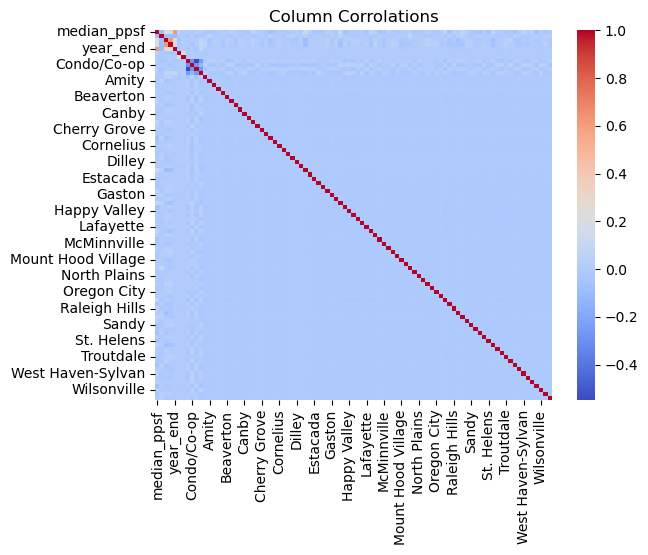

In [86]:
import seaborn as sns

sns.heatmap(x_corr, cmap='coolwarm').set(title="Column Corrolations");

My plot above showing all the correlations between the columns is not readable

lets look at them individually

In [87]:
x_corr

,median_ppsf,median_dom,avg_sale_to_list,sold_above_list,year_end,month_end,day_end,All Residential,Condo/Co-op,Single Family Residential,...,Tualatin,Vernonia,Warren,West Haven-Sylvan,West Linn,West Slope,Willamina,Wilsonville,Wood Village,Yamhill
median_ppsf,1.000000,-0.085639,0.239126,0.180534,0.614677,0.044179,0.011505,0.011563,-0.014317,0.028175,...,-0.005183,-0.055989,0.007418,0.058446,0.001747,0.038910,-0.067581,0.015149,-0.039240,-0.000384
median_dom,-0.085639,1.000000,-0.077121,-0.083018,-0.101993,-0.018942,-0.010974,-0.035390,0.019591,-0.035222,...,-0.010827,0.040468,0.008572,-0.018909,-0.010582,-0.000900,0.017827,-0.009981,0.027608,0.021543
avg_sale_to_list,0.239126,-0.077121,1.000000,0.618280,0.294792,-0.030488,0.004936,-0.011406,0.000561,-0.003186,...,0.037452,-0.034503,-0.022855,0.002107,-0.004640,0.004361,-0.023997,-0.000364,0.019531,-0.018876
sold_above_list,0.180534,-0.083018,0.618280,1.000000,0.272285,-0.030783,-0.000387,-0.008104,-0.039472,0.002665,...,0.019405,-0.017869,-0.036648,-0.019534,-0.026782,-0.004179,-0.003602,-0.016601,0.043566,-0.008726
year_end,0.614677,-0.101993,0.294792,0.272285,1.000000,-0.022054,-0.005212,-0.027076,0.000399,-0.028216,...,0.000185,-0.002301,-0.004023,0.006373,0.002416,-0.000617,0.000422,0.000486,-0.005005,0.003811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Slope,0.038910,-0.000900,0.004361,-0.004179,-0.000617,-0.002187,0.003292,-0.001684,0.022086,-0.001054,...,-0.016196,-0.011688,-0.011218,-0.015755,-0.016260,1.000000,-0.011775,-0.016148,-0.013351,-0.010894
Willamina,-0.067581,0.017827,-0.023997,-0.003602,0.000422,-0.006914,-0.005663,0.025246,-0.037907,0.023528,...,-0.013665,-0.009861,-0.009464,-0.013293,-0.013719,-0.011775,1.000000,-0.013624,-0.011264,-0.009191
Wilsonville,0.015149,-0.009981,-0.000364,-0.016601,0.000486,-0.001397,-0.000309,-0.026763,0.049043,-0.026075,...,-0.018739,-0.013523,-0.012979,-0.018229,-0.018813,-0.016148,-0.013624,1.000000,-0.015448,-0.012604
Wood Village,-0.039240,0.027608,0.019531,0.043566,-0.005005,0.002377,-0.000445,0.001184,0.032821,-0.003617,...,-0.015494,-0.011181,-0.010731,-0.015072,-0.015555,-0.013351,-0.011264,-0.015448,1.000000,-0.010421


Lets set a threshold of + or - .3 and see if any correlations are equal to or above it

In [88]:
# looks to see if column vs another is .3 or more, makes everything else null
corr_threshold = 0.3
x_filtered = x_corr[(abs(x_corr) >= corr_threshold) & (x_corr!=1)]

# shows how many meat this criteria 
x_filtered.count().sum() 

6

We see that there are 6 correlations over .3

We will look at each and remove the one with less variation

In [89]:
# allows me to see which columns are correlated 
x_filtered[x_filtered.notnull().sum()==1]

,median_ppsf,median_dom,avg_sale_to_list,sold_above_list,year_end,month_end,day_end,All Residential,Condo/Co-op,Single Family Residential,...,Tualatin,Vernonia,Warren,West Haven-Sylvan,West Linn,West Slope,Willamina,Wilsonville,Wood Village,Yamhill
median_ppsf,NaN,NaN,NaN,NaN,0.614677,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_sale_to_list,NaN,NaN,NaN,0.61828,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sold_above_list,NaN,NaN,0.61828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_end,0.614677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
All Residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.547289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Single Family Residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.547289,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# look at column name, and see if it has any correlations over .3
col = "avg_sale_to_list"
print(col)
x_nnull = x_filtered[col][(x_filtered[col].notnull())]
x_nnull

avg_sale_to_list


sold_above_list    0.61828
Name: avg_sale_to_list, dtype: float64

In [91]:
# looking for std of each and will compare
x[["avg_sale_to_list", "sold_above_list"]].describe()

,avg_sale_to_list,sold_above_list
count,27753.000000,27753.000000
mean,0.996186,0.355514
std,0.039518,0.291402
min,0.500132,0.000000
25%,0.983319,0.111111
50%,0.997772,0.333333
75%,1.009757,0.500000
max,1.814656,1.000000


we will drop `sold_above_list` as it has lover variation, lower std

In [92]:
# drop sold_above_list
x = x.drop(columns="sold_above_list")

In [93]:
# sanity
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753 entries, 0 to 27752
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   median_ppsf                27753 non-null  float64
 1   median_dom                 27753 non-null  float64
 2   avg_sale_to_list           27753 non-null  float64
 3   year_end                   27753 non-null  int64  
 4   month_end                  27753 non-null  int64  
 5   day_end                    27753 non-null  int64  
 6   All Residential            27753 non-null  uint8  
 7   Condo/Co-op                27753 non-null  uint8  
 8   Single Family Residential  27753 non-null  uint8  
 9   Townhouse                  27753 non-null  uint8  
 10  Aloha                      27753 non-null  uint8  
 11  Amity                      27753 non-null  uint8  
 12  Banks                      27753 non-null  uint8  
 13  Barlow                     27753 non-null  uin

We will run the correlations again, see what has changed, and repeat the process until all correlations are below .3

In [94]:
# ran new correlations on changed x dataframe
x_corr = x.corr()

In [95]:
# looks to see if column vs another is .3 or more, makes everything else null
corr_threshold = 0.3
x_filtered = x_corr[(abs(x_corr) >= corr_threshold) & (x_corr!=1)]

# shows how many meat this criteria 
x_filtered.count().sum() 

4

In [96]:
# allows me to see which columns are correlated 
x_filtered[x_filtered.notnull().sum()==1]

,median_ppsf,median_dom,avg_sale_to_list,year_end,month_end,day_end,All Residential,Condo/Co-op,Single Family Residential,Townhouse,...,Tualatin,Vernonia,Warren,West Haven-Sylvan,West Linn,West Slope,Willamina,Wilsonville,Wood Village,Yamhill
median_ppsf,NaN,NaN,NaN,0.614677,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_end,0.614677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
All Residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.547289,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Single Family Residential,NaN,NaN,NaN,NaN,NaN,NaN,-0.547289,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# look at column name, and see if it has any correlations over .3
col = "All Residential"
print(col)
x_nnull = x_filtered[col][(x_filtered[col].notnull())]
x_nnull

All Residential


Single Family Residential   -0.547289
Name: All Residential, dtype: float64

In [98]:
# looking for std of each and will compare
x[["All Residential", "Single Family Residential"]].describe()

,All Residential,Single Family Residential
count,27753.000000,27753.000000
mean,0.354989,0.352430
std,0.478519,0.477736
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


 `All Residential` and `Single Family Residential` are very close to variation. 
 
 We will drop `Single Family Residential` as it is a smidge less.

In [99]:
# drop avg_sale_to_list
x = x.drop(columns="Single Family Residential")

We will run one more correlation test to see if any are still above .3

In [100]:
# ran new correlations on changed x dataframe
x_corr = x.corr()

In [101]:
# looks to see if column vs another is .3 or more, makes everything else null
corr_threshold = 0.3
x_filtered = x_corr[(abs(x_corr) >= corr_threshold) & (x_corr!=1)]

# shows how many meat this criteria 
x_filtered.count().sum() 

2

The last correlation we see is between `median_ppsf` and `year_end`

In [102]:
# allows me to see which columns are correlated 
x_filtered[x_filtered.notnull().sum()==1]

,median_ppsf,median_dom,avg_sale_to_list,year_end,month_end,day_end,All Residential,Condo/Co-op,Townhouse,Aloha,...,Tualatin,Vernonia,Warren,West Haven-Sylvan,West Linn,West Slope,Willamina,Wilsonville,Wood Village,Yamhill
median_ppsf,NaN,NaN,NaN,0.614677,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_end,0.614677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# looking for std of each and will compare
x[["median_ppsf", "year_end"]].describe()

,median_ppsf,year_end
count,27753.000000,27753.000000
mean,201.429056,2017.173495
std,85.601080,3.143452
min,18.726592,2012.000000
25%,150.391914,2015.000000
50%,196.251568,2017.000000
75%,241.730280,2020.000000
max,7943.245210,2023.000000


We can see above that `median_ppsf` has way more variability than `year_end`, so we will removed `year_end`.

In [104]:
# drop avg_sale_to_list
x = x.drop(columns="year_end")

In [105]:
# sanity
x.head()

,median_ppsf,median_dom,avg_sale_to_list,month_end,day_end,All Residential,Condo/Co-op,Townhouse,Aloha,Amity,...,Tualatin,Vernonia,Warren,West Haven-Sylvan,West Linn,West Slope,Willamina,Wilsonville,Wood Village,Yamhill
0,113.102272,85.0,0.953472,1,31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118.160670,135.0,0.943829,1,31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,121.621622,164.0,0.980100,1,31,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,56.951548,155.0,0.859180,1,31,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,114.373978,142.0,0.964494,1,31,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


lets run one more correlation test to see if there is anything left over a correlation of .3 besides the ones equal to each other.

In [106]:
x_corr = x.corr()

In [107]:
# looks to see if column vs another is .3 or more, makes everything else null
corr_threshold = 0.3
x_filtered = x_corr[(abs(x_corr) >= corr_threshold) & (x_corr!=1)]

# shows how many meat this criteria 
x_filtered.count().sum() 

0

Everything is below .3 and we can now try to model

## LINEAR_REGRESSION

We are going to run a linear regression model on our data and see how well the model can predict y (`median_sale_price`)

Linear regression is a suitable model for predicting housing prices because it assumes a linear relationship between the predictor variables and the response variable (`median_sale_price`). Additionally, linear regression can provide insight into the importance of each predictor variable in determining the housing price, which can be helpful for understanding the factors that influence housing prices.

We will set a significance level (p-value) to .05

Anything variables that are above the significance level will be dropped one by one to see how it effects the predicted outcome, R-squared.

Before that, we will also split our 

In [108]:
# import proper module
import statsmodels.api as sm

In [109]:
# add constant
x_withconstant = sm.add_constant(x).copy()

In [110]:
# Instantiate Model
myregression = sm.OLS(y, x_withconstant)

# Fit Model 
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      median_sale_price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     943.8
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:48:52   Log-Likelihood:            -3.6975e+05
No. Observations:               27753   AIC:                         7.397e+05
Df Residuals:                   27664   BIC:                         7.404e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  4.67e+05   5.03e+04      9.287      0.000    3.68e+05    5.66e+05
median_ppsf           2595.4839     11.543    224.852      0.000    2572.859    2618.109
median_dom              27.4154      2.101     13.048      0.000      23.297      31.534
avg_sale_to_list     -6.511e+05   2.41e+04    -26.994      0.000   -6.98e+05   -6.04e+05
month_end            -1018.7447    267.099     -3.814      0.000   -1542.271    -495.218
day_end                831.6609   1151.919      0.722      0.470   -1426.159    3089.480
All Residential      -2.165e+04   2043.421    -10.595      0.000   -2.57e+04   -1.76e+04
Condo/Co-op          -1.879e+05   3006.694    -62.484      0.000   -1.94e+05   -1.82e+05
Townhouse            -1.027e+05   3186.190    -32.235      0.000   -1.09e+05   -9.65e+04
Aloha                 4.016e+04   2.97e+04      1.350      0.177   -1.81e+04    9.85e+04
Amity                -6796.2749   3.05e+04     -0.223      0.824   -6.66e+04     5.3e+04
Banks                 5.276e+04   3.05e+04      1.731      0.083   -6972.525    1.12e+05
Barlow                8.363e+04   3.91e+04      2.138      0.033    6952.237     1.6e+05
Beavercreek           1.199e+05   3.05e+04      3.937      0.000    6.02e+04     1.8e+05
Beaverton             5.029e+04   2.97e+04      1.694      0.090   -7899.524    1.08e+05
Bethany               7.508e+04   2.99e+04      2.514      0.012    1.66e+04    1.34e+05
Boring                9.117e+04   3.08e+04      2.963      0.003    3.09e+04    1.51e+05
Bull Mountain         1.438e+05   3.02e+04      4.759      0.000    8.46e+04    2.03e+05
Canby                 5.336e+04      3e+04      1.781      0.075   -5353.477    1.12e+05
Carlton               4.688e+04   3.04e+04      1.540      0.123   -1.28e+04    1.07e+05
Cedar Hills          -8.687e+04   3.04e+04     -2.858      0.004   -1.46e+05   -2.73e+04
Cedar Mill            1.287e+05   2.99e+04      4.300      0.000       7e+04    1.87e+05
Cherry Grove          -802.9937   3.28e+04     -0.024      0.980   -6.51e+04    6.35e+04
Clackamas             6.623e+04   3.02e+04      2.196      0.028    7104.211    1.25e+05
Clatskanie            6.186e+04   3.04e+04      2.035      0.042    2272.046    1.21e+05
Columbia City         3.199e+04   3.05e+04      1.049      0.294   -2.78e+04    9.17e+04
Cornelius             1.569e+04   3.01e+04      0.521      0.602   -4.33e+04    7.47e+04
Damascus              1.126e+05   3.02e+04      3.723      0.000    5.33e+04    1.72e+05
Dayton               -6883.3853   3.04e+04     -0.226      0.821   -6.66e+04    5.28e+04
Deer Island           6.352e+04   3.23e+04      1.966      0.049     191.152    1.27e+05
Dilley                -1.58e+04    3.5e+04     -0.452      0.652   -8.44e+04    5.28e+04
Dundee                1.365e+04   3.05e+04      0.448    

In [111]:
myregression_results.pvalues[myregression_results.pvalues > .05]

day_end                 0.470314
Aloha                   0.177015
Amity                   0.823718
Banks                   0.083417
Beaverton               0.090282
Canby                   0.074868
Carlton                 0.123478
Cherry Grove            0.980485
Columbia City           0.294054
Cornelius               0.602216
Dayton                  0.821154
Dilley                  0.651511
Dundee                  0.653991
Estacada                0.421769
Fairview                0.203796
Forest Grove            0.118535
Garden Home-Whitford    0.195622
Gaston                  0.620203
Gladstone               0.175184
Hillsboro               0.113264
Jennings Lodge          0.082807
King City               0.487512
Lafayette               0.451525
Marlene Village         0.254551
McMinnville             0.250690
Metzger                 0.791275
Milwaukie               0.273624
Molalla                 0.913566
Mount Hood Village      0.292754
Mount Hood Villages     0.607259
Newberg   

We can see above allmost half of the variables have p values that are above .05

We do see as well the our R-squared value is .75

Our data can explain the variation in the data pretty well. 

We will see if we can improve upon it by removing variables?

In [112]:
R_value =[]
for p in np.arange(.05,.95,.05):
    
    # index of all variables with p value higher than p
    p_index = myregression_results.pvalues[myregression_results.pvalues >= p].index
   
    # Drop rows with with p value higher than p
    x_withconstant_2 = x_withconstant.drop(columns=p_index)
    
    # Instantiate Model
    myregression_2 = sm.OLS(y, x_withconstant_2)

    # Fit Model 
    myregression_results_2 = myregression_2.fit()

    # append R_value
    R_value.append(myregression_results_2.rsquared)
    
    

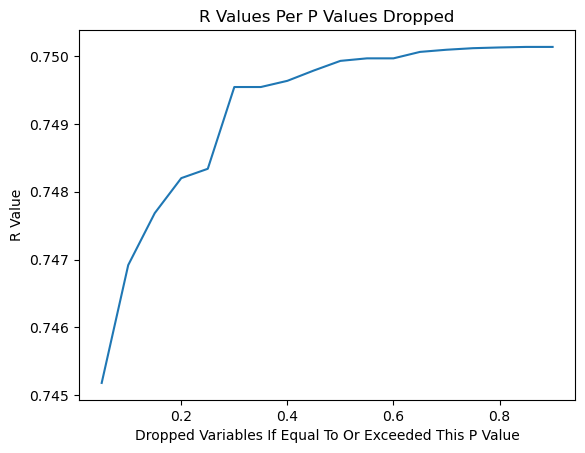

In [113]:
import matplotlib.pyplot as plt

plt.plot(np.arange(.05,.95,.05), R_value)
plt.title("R Values Per P Values Dropped")
plt.ylabel("R Value")
plt.xlabel("Dropped Variables If Equal To Or Exceeded This P Value" )
plt.show()

What can be seen above is every time I would removed anything, my R Squared value would get weaker, but not by much.

Let's explore what would happen if we split the data into test and training sets to assess the performance of a linear regression model.

In [135]:
total_count = df_co.count()[0]
before_2021 = df_co[df_co["year_end"]<2021].count()[0]
print(f"total {total_count}")
print(f"before 2021 {before_2021}")
print(f"percentage {before_2021/total_count}")


total 27753
before 2021 22404
percentage 0.8072640795589666


The above shows that we can split the data to anything after the year 2020, and that would be rouphly 20 percent of all everything. 

That will be our testing set, and everything else will be our training set. 

We now have to split everything into x-train, y-train, x-test, and y-test.

In [158]:
# creating new columns referencing year end, need new to create a newdataframe as current x and y do not have them.
new_x = df_co.drop(columns=['median_sale_price',"sold_above_list","Single Family Residential",])
pd.DataFrame(new_x)

,median_ppsf,median_dom,avg_sale_to_list,year_end,month_end,day_end,All Residential,Condo/Co-op,Townhouse,Aloha,...,Tualatin,Vernonia,Warren,West Haven-Sylvan,West Linn,West Slope,Willamina,Wilsonville,Wood Village,Yamhill
0,113.102272,85.0,0.953472,2012,1,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118.160670,135.0,0.943829,2012,1,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,121.621622,164.0,0.980100,2012,1,31,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,56.951548,155.0,0.859180,2012,1,31,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,114.373978,142.0,0.964494,2012,1,31,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27748,275.438249,21.0,0.991811,2023,1,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27749,290.055249,9.0,0.980415,2023,1,31,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27750,296.333003,48.0,0.971953,2023,1,31,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27751,324.910434,7.0,0.994274,2023,1,31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
# create x_train off of new dataset for everything below 2021
x_train = new_x.loc[new_x["year_end"]<2021].copy()
# need to drop year_end, as shown previously it is not needed
x_train = x_train.drop(columns="year_end")

x_test = new_x.loc[new_x["year_end"]>=2021].copy()
x_test = x_test.drop(columns="year_end")

y_train = df_co.loc[new_x["year_end"]<2021].copy()
y_train = y_train.drop(columns="year_end")

y_test = df_co.loc[new_x["year_end"]>=2021].copy()
y_test = y_test.drop(columns="year_end")

We can now instantiate the model, fit our data, score the test and train to compare.

In [165]:
from sklearn.linear_model import LinearRegression

# Instantiate model 
Linear_regression_model = LinearRegression()

# Fit model on the training data
Linear_regression_model.fit(x_train, y_train)

# Score on the training data 
print(Linear_regression_model.score(x_train, y_train))

# Score on the testing data
print(Linear_regression_model.score(x_test, y_test))

0.9882604623771752
0.9843099565176023
